In [1]:
#套件導入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tejapi
from sklearn.ensemble import RandomForestClassifier
tejapi.ApiConfig.api_key = 'Your Key'
tejapi.ApiConfig.ignoretz = True

In [2]:
security = tejapi.get('TWN/ANPRCSTD',
          mkt = 'TSE',
          stypenm = '普通股',
          paginate = True,
          chinese_column_name = True)
security

,證券碼,目前狀態,證券名稱,證券全稱,英文簡稱,英文全稱,統一編號,上市別,證券種類代碼,證券種類名稱,TEJ業別,TEJ產業名,TSE業別,TSE產業名
None,,,,,,,,,,,,,,
0,1101,2021-01-01,台泥,台灣水泥,Taiwan Cement,Taiwan Cement Corp.,11913502,TSE,STOCK,普通股,11A,水泥製造,01,水泥工業
1,1102,2021-01-01,亞泥,亞洲水泥,Asia Cement,Asia Cement Corp.,03244509,TSE,STOCK,普通股,11A,水泥製造,01,水泥工業
2,1103,2021-01-01,嘉泥,嘉新水泥,Chia Hsin Cement,Chia Hsin Cement Corp.,11892801,TSE,STOCK,普通股,11A,水泥製造,01,水泥工業
3,1104,2021-01-01,環泥,環球水泥,Universal Cement,Universal Cement Corporation,07568009,TSE,STOCK,普通股,11A,水泥製造,01,水泥工業
4,1108,2021-01-01,幸福,幸福水泥,Lucky Cement,Lucky Cement Corporation,40601248,TSE,STOCK,普通股,11A,水泥製造,01,水泥工業
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,9944,2021-01-01,新麗,新麗企業,Shinih,"Shinih Enterprise Co., Ltd.",33375909,TSE,STOCK,普通股,14F,不織布,20,其他
877,9945,2021-01-01,潤泰新,潤泰創新國際,Ruentex Develop,"Ruentex Development Co., Ltd.",12139612,TSE,STOCK,普通股,25A,建設,20,其他
878,9946,2021-01-01,三發地產,三發地產,SanFar,San Far Property Limited,84466749,TSE,STOCK,普通股,25A,建設,14,建材營造


In [3]:
industry_code = security[['證券碼', 'TSE業別']]
industry_code = industry_code.set_index('證券碼').to_dict()['TSE業別']

In [4]:
industry_code

{'1101': '01',
 '1102': '01',
 '1103': '01',
 '1104': '01',
 '1108': '01',
 '1109': '01',
 '1110': '01',
 '1201': '02',
 '1203': '02',
 '1210': '02',
 '1213': '02',
 '1215': '02',
 '1216': '02',
 '1217': '02',
 '1218': '02',
 '1219': '02',
 '1220': '02',
 '1225': '02',
 '1227': '02',
 '1229': '02',
 '1231': '02',
 '1232': '02',
 '1233': '02',
 '1234': '02',
 '1235': '02',
 '1236': '02',
 '1301': '03',
 '1303': '03',
 '1304': '03',
 '1305': '03',
 '1307': '03',
 '1308': '03',
 '1309': '03',
 '1310': '03',
 '1312': '03',
 '1313': '03',
 '1314': '03',
 '1315': '03',
 '1316': '14',
 '1319': '12',
 '1321': '03',
 '1323': '03',
 '1324': '03',
 '1325': '03',
 '1326': '03',
 '1339': '12',
 '1342': '20',
 '1402': '04',
 '1409': '04',
 '1410': '04',
 '1413': '04',
 '1414': '04',
 '1416': '20',
 '1417': '04',
 '1418': '04',
 '1419': '04',
 '1423': '04',
 '1432': '18',
 '1434': '04',
 '1435': '20',
 '1436': '14',
 '1437': '20',
 '1438': '14',
 '1439': '04',
 '1440': '04',
 '1441': '04',
 '1442': '

In [5]:
security_list = security['證券碼'].tolist()
security_list

['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1507',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 

In [6]:
groups = []
while True:
    if len(security_list) >= 50:
        groups.append(security_list[:50])
        security_list = security_list[50:]
    elif 0 <= len(security_list) < 50:
        groups.append(security_list)
        break

In [7]:
groups

[['1101',
  '1102',
  '1103',
  '1104',
  '1108',
  '1109',
  '1110',
  '1201',
  '1203',
  '1210',
  '1213',
  '1215',
  '1216',
  '1217',
  '1218',
  '1219',
  '1220',
  '1225',
  '1227',
  '1229',
  '1231',
  '1232',
  '1233',
  '1234',
  '1235',
  '1236',
  '1301',
  '1303',
  '1304',
  '1305',
  '1307',
  '1308',
  '1309',
  '1310',
  '1312',
  '1313',
  '1314',
  '1315',
  '1316',
  '1319',
  '1321',
  '1323',
  '1324',
  '1325',
  '1326',
  '1339',
  '1342',
  '1402',
  '1409',
  '1410'],
 ['1413',
  '1414',
  '1416',
  '1417',
  '1418',
  '1419',
  '1423',
  '1432',
  '1434',
  '1435',
  '1436',
  '1437',
  '1438',
  '1439',
  '1440',
  '1441',
  '1442',
  '1443',
  '1444',
  '1445',
  '1446',
  '1447',
  '1449',
  '1451',
  '1452',
  '1453',
  '1454',
  '1455',
  '1456',
  '1457',
  '1459',
  '1460',
  '1463',
  '1464',
  '1465',
  '1466',
  '1467',
  '1468',
  '1470',
  '1471',
  '1472',
  '1473',
  '1474',
  '1475',
  '1476',
  '1477',
  '1503',
  '1504',
  '1506',
  '1507']

In [8]:
fin_data = pd.DataFrame()   #財務資料
ret_data = pd.DataFrame()   #報酬率資料
date_data = pd.DataFrame()  #日期資料

for group in groups:
    fin_data = fin_data.append(tejapi.get('TWN/EWIFINQ',
                  coid = group,
                  chinese_column_name = True,
                  paginate = True)).reset_index(drop=True)
    ret_data = ret_data.append(tejapi.get('TWN/APRCD2',
           coid = group,
           opts = {'columns': ['coid', 'mdate', 'roi_q']},
           paginate = True,
           chinese_column_name = True)).reset_index(drop=True)
    date_data = date_data.append(tejapi.get('TWN/EWFINDATE2',
           coid = group,
           opts = {'columns': ['coid', 'mdate', 'fin_date']},
           paginate = True,
           chinese_column_name = True)).reset_index(drop=True)

In [9]:
fin_data

,證券碼,財務資料日,季別,合併(Y/N),單季(Q)/單半年(H),月份,幣別,財報發布日,ROA(C) 稅前息前折舊前,ROE(A)-稅後,...,歸屬母公司淨利（損）,每股盈餘,普通股每股現金股利（盈餘及公積）,普通股每股股票股利－盈餘,普通股每股股票股利－公積,折舊－CFO,攤提－CFO,來自營運之現金流量,投資活動之現金流量,籌資活動之現金流量
0,1101,2008-03-01,1,Y,Q,03,NTD,2008-04-28,8.52,6.68,...,1282239.0,1.56,None,None,None,1338102.0,89771.0,2489359.0,-971958.0,1169557.0
1,1101,2008-06-01,2,Y,Q,06,NTD,2008-08-27,9.04,10.80,...,2264630.0,2.76,None,None,None,1373846.0,168336.0,2093065.0,-2923872.0,481040.0
2,1101,2008-09-01,3,Y,Q,09,NTD,2008-10-29,7.88,5.92,...,1099275.0,1.32,None,None,None,1401061.0,40163.0,6649673.0,-2554697.0,-5488726.0
3,1101,2008-12-01,4,Y,Q,12,NTD,2009-04-29,6.76,3.60,...,1115114.0,1.36,None,None,None,1545899.0,146802.0,1180007.0,-3659750.0,3888830.0
4,1101,2009-03-01,1,Y,Q,03,NTD,2009-05-15,6.00,2.12,...,182490.0,0.24,None,None,None,1651902.0,84734.0,2946133.0,-1658918.0,21583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45176,9958,2020-09-01,3,Y,Q,09,NTD,2020-11-12,15.56,22.92,...,285666.0,5.40,None,None,None,73565.0,0.0,428862.0,-461754.0,211176.0
45177,9958,2020-12-01,4,Y,Q,12,NTD,2021-03-03,13.96,19.80,...,317095.0,5.96,None,None,None,83293.0,175.0,29046.0,-758788.0,609869.0
45178,9958,2021-03-01,1,Y,Q,03,NTD,2021-05-14,11.24,13.40,...,243071.0,4.24,None,None,None,88012.0,258.0,494483.0,-1117439.0,384566.0
45179,9958,2021-06-01,2,Y,Q,06,NTD,2021-08-16,11.24,21.08,...,422570.0,7.36,None,None,None,93772.0,288.0,-561369.0,-1556761.0,2175289.0


In [10]:
ret_data

,證券代碼,年月日,季報酬率 %
0,1101,2000-01-04,29.5880
1,1101,2000-01-05,37.5970
2,1101,2000-01-06,36.5462
3,1101,2000-01-07,40.6640
4,1101,2000-01-10,47.0589
...,...,...,...
4037449,9958,2021-12-07,3.7381
4037450,9958,2021-12-08,7.2813
4037451,9958,2021-12-09,3.2861
4037452,9958,2021-12-10,-0.9135


In [11]:
date_data

,證券碼,交易日期,財務公告日
0,1101,2010-01-04,2009-10-30
1,1101,2010-01-05,2009-10-30
2,1101,2010-01-06,2009-10-30
3,1101,2010-01-07,2009-10-30
4,1101,2010-01-08,2009-10-30
...,...,...,...
2435148,9958,2021-12-07,2021-11-12
2435149,9958,2021-12-08,2021-11-12
2435150,9958,2021-12-09,2021-11-12
2435151,9958,2021-12-10,2021-11-12


In [12]:
date_data = date_data.groupby(['證券碼', '財務公告日']).last().reset_index() #取得下一次財報公布前的最後一筆交易日期
date_data = date_data.rename(columns = {'交易日期':'年月日', '財務公告日':'財報發布日'})                #改變欄名以利合併
date_data

,證券碼,財報發布日,年月日
0,1101,2009-10-30,2010-04-26
1,1101,2010-04-27,2010-04-29
2,1101,2010-04-30,2010-08-26
3,1101,2010-08-27,2010-11-04
4,1101,2010-11-05,2011-04-28
...,...,...,...
36842,9958,2020-11-12,2021-03-02
36843,9958,2021-03-03,2021-05-13
36844,9958,2021-05-14,2021-08-13
36845,9958,2021-08-16,2021-11-11


In [18]:
#先與財務資料合併，再與報酬率資料合併
merge = date_data.merge(fin_data, on = ['證券碼', '財報發布日'])
merge = merge.rename(columns = {'證券碼':'證券代碼'})
merge = merge.merge(ret_data, on = ['證券代碼', '年月日'])
merge = merge.set_index(['證券代碼', '財務資料日']).select_dtypes(include=np.number)
merge

ROA(C) 稅前息前折舊前  ROE(A)-稅後  營業毛利率  營業利益率  稅後淨利率  CFO/負債  \
證券代碼 財務資料日                                                                
1101 2009-09-01           12.64      16.80  20.50  17.33  17.99    0.28   
     2009-12-01           13.40      16.80  22.29  18.25  16.75    0.20   
     2010-03-01            7.56       5.72  13.22   9.77   6.62    0.14   
     2010-06-01           10.84      12.72  18.48  14.61  12.53   -0.01   
     2010-09-01           12.40      15.20  18.04  14.71  14.18    0.14   
...                         ...        ...    ...    ...    ...     ...   
9958 2020-09-01           15.56      22.92  32.79  25.80  19.82    0.20   
     2020-12-01           13.96      19.80  31.79  27.71  22.28    0.01   
     2021-03-01           11.24      13.40  29.20  22.84  18.90    0.23   
     2021-06-01           11.24      21.08  24.31  19.98  21.33   -0.20   
     2021-09-01           10.00      20.08  24.10  20.86  15.71    0.06   

                 CFO/合併總損益  現金流量比率  每股淨值(F)-TSE公告數   營收成長率  ...     所得稅費用  \
證券代碼 財務資料日                                                  ...             
1101 2009-09-01       1.76   18.22           23.36   -1.20  ...  -25529.0   
     2009-12-01       1.22    9.99           24.03   41.87  ...  477110.0   
     2010-03-01       2.82    8.79           24.45   21.87  ...  278039.0   
     2010-06-01      -0.14   -0.80           22.92   19.87  ...  366941.0   
     2010-09-01       1.03    8.79           24.78   27.83  ...  299419.0   
...                    ...     ...             ...     ...  ...       ...   
9958 2020-09-01       1.06   11.82           26.38  259.77  ...   96953.0   
     2020-12-01       0.07    0.80           31.87   93.23  ...  106891.0   
     2021-03-01       1.57   13.38           31.28   40.69  ...   82670.0   
     2021-06-01      -1.08  -10.96           33.32   86.79  ...  111604.0   
     2021-09-01       0.48    3.38           31.78   61.48  ...  158244.0   

                     合併總損益  歸屬母公司淨利（損）  每股盈餘     折舊－CFO    攤提－CFO  來自營運之現金流量  \
證券代碼 財務資料日                                                                     
1101 2009-09-01  3996765.0   2738650.0  3.32  1552079.0  121297.0  7051003.0   
     2009-12-01  4165917.0   2549378.0  3.08  1441264.0  158110.0  5072038.0   
     2010-03-01  1457637.0    924955.0  1.12  1662018.0   89810.0  4106544.0   
     2010-06-01  3251797.0   1912184.0  2.32  1675354.0  191315.0  -460324.0   
     2010-09-01  4025784.0   2558816.0  3.12  1895988.0  178321.0  4143204.0   
...                    ...         ...   ...        ...       ...        ...   
9958 2020-09-01   403927.0    285666.0  5.40    73565.0       0.0   428862.0   
     2020-12-01   419822.0    317095.0  5.96    83293.0     175.0    29046.0   
     2021-03-01   314620.0    243071.0  4.24    88012.0     258.0   494483.0   
     2021-06-01   519358.0    422570.0  7.36    93772.0     288.0  -561369.0   
     2021-09-01   516824.0    410803.0  7.12   101465.0     297.0   245725.0   

                  投資活動之現金流量   籌資活動之現金流量   季報酬率 %  
證券代碼 財務資料日                                        
1101 2009-09-01   -692249.0  -4362418.0  -5.2631  
     2009-12-01  -7047435.0   4195760.0  -5.1926  
     2010-03-01 -13840210.0  10508301.0  21.1107  
     2010-06-01   1255236.0  -1595374.0  14.0473  
     2010-09-01  -4209678.0  -2768811.0  32.5355  
...                     ...         ...      ...  
9958 2020-09-01   -461754.0    211176.0  -9.9208  
     2020-12-01   -758788.0    609869.0   2.4154  
     2021-03-01  -1117439.0    384566.0   9.4340  
     2021-06-01  -1556761.0   2175289.0   0.8701  
     2021-09-01  -1421873.0   1282159.0   1.8516  

[40639 rows x 56 columns]

In [19]:
#切割訓練 測試集, 將缺失值補0
condition = merge.index.get_level_values('財務資料日') < '2020'
train_data = merge[condition].fillna(0)
test_data = merge[~condition].fillna(0)

In [20]:
train_data

ROA(C) 稅前息前折舊前  ROE(A)-稅後  營業毛利率  營業利益率   稅後淨利率  CFO/負債  \
證券代碼 財務資料日                                                                 
1101 2009-09-01           12.64      16.80  20.50  17.33   17.99    0.28   
     2009-12-01           13.40      16.80  22.29  18.25   16.75    0.20   
     2010-03-01            7.56       5.72  13.22   9.77    6.62    0.14   
     2010-06-01           10.84      12.72  18.48  14.61   12.53   -0.01   
     2010-09-01           12.40      15.20  18.04  14.71   14.18    0.14   
...                         ...        ...    ...    ...     ...     ...   
9958 2018-12-01            0.40      -1.20  11.57  -2.88   -3.27   -0.01   
     2019-03-01            2.20       0.52  16.03   8.12    1.62    0.28   
     2019-06-01            1.96       0.04  13.14   4.73    0.12    0.11   
     2019-09-01           -1.68      43.64   3.91 -15.05  100.61   -0.39   
     2019-12-01          -17.80       8.28  22.91  15.05   11.82   -0.15   

                 CFO/合併總損益  現金流量比率  每股淨值(F)-TSE公告數   營收成長率  ...     所得稅費用  \
證券代碼 財務資料日                                                  ...             
1101 2009-09-01       1.76   18.22           23.36   -1.20  ...  -25529.0   
     2009-12-01       1.22    9.99           24.03   41.87  ...  477110.0   
     2010-03-01       2.82    8.79           24.45   21.87  ...  278039.0   
     2010-06-01      -0.14   -0.80           22.92   19.87  ...  366941.0   
     2010-09-01       1.03    8.79           24.78   27.83  ...  299419.0   
...                    ...     ...             ...     ...  ...       ...   
9958 2018-12-01       1.09   -1.01           17.68  -17.66  ...    4096.0   
     2019-03-01      58.10   24.92           17.97   -2.90  ...    7965.0   
     2019-06-01     278.98    8.47           17.83   13.54  ...    7323.0   
     2019-09-01      -0.78  -18.08           20.59   32.61  ...   20024.0   
     2019-12-01      -1.87   -8.87           21.22  138.03  ...   34722.0   

                     合併總損益  歸屬母公司淨利（損）   每股盈餘     折舊－CFO    攤提－CFO  來自營運之現金流量  \
證券代碼 財務資料日                                                                      
1101 2009-09-01  3996765.0   2738650.0   3.32  1552079.0  121297.0  7051003.0   
     2009-12-01  4165917.0   2549378.0   3.08  1441264.0  158110.0  5072038.0   
     2010-03-01  1457637.0    924955.0   1.12  1662018.0   89810.0  4106544.0   
     2010-06-01  3251797.0   1912184.0   2.32  1675354.0  191315.0  -460324.0   
     2010-09-01  4025784.0   2558816.0   3.12  1895988.0  178321.0  4143204.0   
...                    ...         ...    ...        ...       ...        ...   
9958 2018-12-01   -13377.0     -2305.0  -0.04    16051.0       0.0   -14549.0   
     2019-03-01     6486.0     14385.0   0.28    21044.0       0.0   376840.0   
     2019-06-01      561.0      8897.0   0.16    20755.0       0.0   156509.0   
     2019-09-01   569881.0    584969.0  11.16    27935.0       0.0  -442692.0   
     2019-12-01   115302.0    130617.0   2.48    43355.0       0.0  -215862.0   

                  投資活動之現金流量   籌資活動之現金流量   季報酬率 %  
證券代碼 財務資料日                                        
1101 2009-09-01   -692249.0  -4362418.0  -5.2631  
     2009-12-01  -7047435.0   4195760.0  -5.1926  
     2010-03-01 -13840210.0  10508301.0  21.1107  
     2010-06-01   1255236.0  -1595374.0  14.0473  
     2010-09-01  -4209678.0  -2768811.0  32.5355  
...                     ...         ...      ...  
9958 2018-12-01   -462348.0   1100177.0 -14.1192  
     2019-03-01   -668796.0   -262984.0  22.2045  
     2019-06-01   -692789.0     27424.0   0.7917  
     2019-09-01   2030802.0  -2217437.0  -0.5334  
     2019-12-01   -536876.0    494947.0  27.2196  

[34477 rows x 56 columns]

In [21]:
test_data

ROA(C) 稅前息前折舊前  ROE(A)-稅後  營業毛利率  營業利益率  稅後淨利率  CFO/負債  \
證券代碼 財務資料日                                                                
1101 2020-03-01            7.84       6.68  26.30  20.30  15.84    0.20   
     2020-06-01           14.20      17.12  35.71  30.61  28.38    0.23   
     2020-09-01           13.68      17.00  35.40  30.37  28.79    0.04   
     2020-12-01           12.16      13.68  32.30  26.48  22.68    0.26   
     2021-03-01            7.28       6.72  25.07  19.09  16.93    0.17   
...                         ...        ...    ...    ...    ...     ...   
9958 2020-09-01           15.56      22.92  32.79  25.80  19.82    0.20   
     2020-12-01           13.96      19.80  31.79  27.71  22.28    0.01   
     2021-03-01           11.24      13.40  29.20  22.84  18.90    0.23   
     2021-06-01           11.24      21.08  24.31  19.98  21.33   -0.20   
     2021-09-01           10.00      20.08  24.10  20.86  15.71    0.06   

                 CFO/合併總損益  現金流量比率  每股淨值(F)-TSE公告數   營收成長率  ...      所得稅費用  \
證券代碼 財務資料日                                                  ...              
1101 2020-03-01       2.19   11.86           33.97  -13.33  ...  1252757.0   
     2020-06-01       1.25   12.65           32.38   -2.88  ...  2161148.0   
     2020-09-01       0.21    2.59           32.61   -3.34  ...  2097249.0   
     2020-12-01       1.51   15.29           34.41   -8.81  ...  1850759.0   
     2021-03-01       1.91    9.54           34.63    0.28  ...  1113682.0   
...                    ...     ...             ...     ...  ...        ...   
9958 2020-09-01       1.06   11.82           26.38  259.77  ...    96953.0   
     2020-12-01       0.07    0.80           31.87   93.23  ...   106891.0   
     2021-03-01       1.57   13.38           31.28   40.69  ...    82670.0   
     2021-06-01      -1.08  -10.96           33.32   86.79  ...   111604.0   
     2021-09-01       0.48    3.38           31.78   61.48  ...   158244.0   

                     合併總損益  歸屬母公司淨利（損）  每股盈餘     折舊－CFO    攤提－CFO   來自營運之現金流量  \
證券代碼 財務資料日                                                                      
1101 2020-03-01  3481119.0   2999822.0  2.20  1698707.0  100106.0   7608468.0   
     2020-06-01  8644566.0   7934801.0  5.56  1677558.0  104846.0  10825773.0   
     2020-09-01  8580617.0   7472614.0  5.20  1704745.0   98149.0   1822727.0   
     2020-12-01  7285091.0   6692072.0  4.68  1763148.0  117824.0  11022308.0   
     2021-03-01  3730237.0   3318974.0  2.28  1727357.0   94667.0   7124458.0   
...                    ...         ...   ...        ...       ...         ...   
9958 2020-09-01   403927.0    285666.0  5.40    73565.0       0.0    428862.0   
     2020-12-01   419822.0    317095.0  5.96    83293.0     175.0     29046.0   
     2021-03-01   314620.0    243071.0  4.24    88012.0     258.0    494483.0   
     2021-06-01   519358.0    422570.0  7.36    93772.0     288.0   -561369.0   
     2021-09-01   516824.0    410803.0  7.12   101465.0     297.0    245725.0   

                  投資活動之現金流量   籌資活動之現金流量   季報酬率 %  
證券代碼 財務資料日                                        
1101 2020-03-01 -23802608.0  -3055852.0   8.3721  
     2020-06-01  -4117086.0  18663122.0  -2.9357  
     2020-09-01   1183061.0 -17850563.0   0.3495  
     2020-12-01  -3211282.0  -1538720.0  26.3160  
     2021-03-01   5292661.0  -1790927.0  -0.9690  
...                     ...         ...      ...  
9958 2020-09-01   -461754.0    211176.0  -9.9208  
     2020-12-01   -758788.0    609869.0   2.4154  
     2021-03-01  -1117439.0    384566.0   9.4340  
     2021-06-01  -1556761.0   2175289.0   0.8701  
     2021-09-01  -1421873.0   1282159.0   1.8516  

[6162 rows x 56 columns]

In [22]:
#跑模型
rf = RandomForestClassifier(n_estimators=100, criterion= 'entropy')
rf.fit(train_data.drop(columns = '季報酬率 %'), train_data['季報酬率 %'] > 0)

RandomForestClassifier(criterion='entropy')

In [23]:
#訓練集分數
print("訓練集分數: " , rf.score(train_data.drop(columns = '季報酬率 %'), train_data['季報酬率 %'] > 0))
print("測試集分數: " , rf.score(test_data.drop(columns = '季報酬率 %'), test_data['季報酬率 %'] > 0))

訓練集分數:  1.0
測試集分數:  0.5488477766958779


In [24]:
#回測
selected = rf.predict(test_data.drop(columns = '季報酬率 %'))
test_data[selected]

ROA(C) 稅前息前折舊前  ROE(A)-稅後  營業毛利率  營業利益率  稅後淨利率  CFO/負債  \
證券代碼 財務資料日                                                                
1101 2020-03-01            7.84       6.68  26.30  20.30  15.84    0.20   
     2020-06-01           14.20      17.12  35.71  30.61  28.38    0.23   
     2020-12-01           12.16      13.68  32.30  26.48  22.68    0.26   
     2021-03-01            7.28       6.72  25.07  19.09  16.93    0.17   
     2021-06-01           11.72      13.60  30.76  25.17  29.56    0.13   
...                         ...        ...    ...    ...    ...     ...   
9946 2021-09-01            3.08       6.28  22.77  15.49  14.07    0.05   
9958 2020-03-01            6.84       7.52  18.78  11.43   9.05    0.06   
     2020-09-01           15.56      22.92  32.79  25.80  19.82    0.20   
     2020-12-01           13.96      19.80  31.79  27.71  22.28    0.01   
     2021-03-01           11.24      13.40  29.20  22.84  18.90    0.23   

                 CFO/合併總損益  現金流量比率  每股淨值(F)-TSE公告數   營收成長率  ...      所得稅費用  \
證券代碼 財務資料日                                                  ...              
1101 2020-03-01       2.19   11.86           33.97  -13.33  ...  1252757.0   
     2020-06-01       1.25   12.65           32.38   -2.88  ...  2161148.0   
     2020-12-01       1.51   15.29           34.41   -8.81  ...  1850759.0   
     2021-03-01       1.91    9.54           34.63    0.28  ...  1113682.0   
     2021-06-01       0.63    7.35           35.28   -8.13  ...  2054650.0   
...                    ...     ...             ...     ...  ...        ...   
9946 2021-09-01       0.97    1.31           20.74  164.31  ...     3082.0   
9958 2020-03-01       0.92    3.75           21.90  195.16  ...    29226.0   
     2020-09-01       1.06   11.82           26.38  259.77  ...    96953.0   
     2020-12-01       0.07    0.80           31.87   93.23  ...   106891.0   
     2021-03-01       1.57   13.38           31.28   40.69  ...    82670.0   

                     合併總損益  歸屬母公司淨利（損）  每股盈餘     折舊－CFO    攤提－CFO   來自營運之現金流量  \
證券代碼 財務資料日                                                                      
1101 2020-03-01  3481119.0   2999822.0  2.20  1698707.0  100106.0   7608468.0   
     2020-06-01  8644566.0   7934801.0  5.56  1677558.0  104846.0  10825773.0   
     2020-12-01  7285091.0   6692072.0  4.68  1763148.0  117824.0  11022308.0   
     2021-03-01  3730237.0   3318974.0  2.28  1727357.0   94667.0   7124458.0   
     2021-06-01  8272940.0   7533092.0  4.96  1565542.0   89145.0   5238887.0   
...                    ...         ...   ...        ...       ...         ...   
9946 2021-09-01   100664.0    100664.0  1.24     1660.0     584.0     97751.0   
9958 2020-03-01   107102.0    115467.0  2.20    47193.0       0.0     98047.0   
     2020-09-01   403927.0    285666.0  5.40    73565.0       0.0    428862.0   
     2020-12-01   419822.0    317095.0  5.96    83293.0     175.0     29046.0   
     2021-03-01   314620.0    243071.0  4.24    88012.0     258.0    494483.0   

                  投資活動之現金流量   籌資活動之現金流量   季報酬率 %  
證券代碼 財務資料日                                        
1101 2020-03-01 -23802608.0  -3055852.0   8.3721  
     2020-06-01  -4117086.0  18663122.0  -2.9357  
     2020-12-01  -3211282.0  -1538720.0  26.3160  
     2021-03-01   5292661.0  -1790927.0  -0.9690  
     2021-06-01   2520953.0  -2166620.0   0.4742  
...                     ...         ...      ...  
9946 2021-09-01   -158953.0    146378.0  -1.5613  
9958 2020-03-01  -1109689.0    379604.0  12.4862  
     2020-09-01   -461754.0    211176.0  -9.9208  
     2020-12-01   -758788.0    609869.0   2.4154  
     2021-03-01  -1117439.0    384566.0   9.4340  

[3599 rows x 56 columns]

<AxesSubplot:xlabel='財務資料日'>

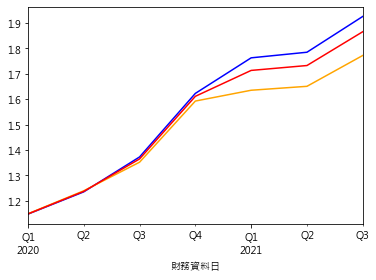

In [25]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  #顯示中文
(test_data[selected].groupby('財務資料日').mean()['季報酬率 %']*0.01 + 1).cumprod().plot(color = 'blue')     #randomforest
(test_data[~selected].groupby('財務資料日').mean()['季報酬率 %']*0.01 + 1).cumprod().plot(color = 'orange')  #benchmark1
(test_data.groupby('財務資料日').mean()['季報酬率 %']*0.01 + 1).cumprod().plot(color = 'red')                #benchmark2

In [26]:
#看權重, 看那些特徵比較重要
feature_name = train_data.columns[:-1]
important = pd.Series(rf.feature_importances_, index = feature_name).sort_values(ascending=False)
important.head(20)

營業利益成長率           0.024568
營收成長率             0.024156
籌資活動之現金流量         0.023968
投資活動之現金流量         0.023403
營業毛利成長率           0.022775
ROE(A)-稅後         0.022527
所得稅費用             0.021892
營業外收入及支出          0.021715
ROA(C) 稅前息前折舊前    0.021581
CFO/合併總損益         0.021544
稅後淨利率             0.021449
每股淨值(F)-TSE公告數    0.021024
折舊－CFO            0.020385
負債比率              0.020232
攤提－CFO            0.020061
營業利益率             0.020022
營業毛利率             0.020012
保留盈餘              0.019989
營業費用              0.019897
來自營運之現金流量         0.019833
dtype: float64

In [27]:
#主觀挑選出值越高 越好的特徵
#positive_features = ['營業利益成長率', '營收成長率', '營業毛利成長率', 'CFO/合併總損益', '每股淨值(F)-TSE公告數', '營業外收入及支出', 'ROE(A)-稅後', '來自營運之現金流量', '現金流量比率', '營業毛利率', '應收帳款週轉次數', '長期資金適合率(A)']
positive_features = ['營業利益成長率', '營收成長率', '投資活動之現金流量', '營業毛利成長率', 'ROE(A)-稅後', '營業外收入及支出', 'ROA(C) 稅前息前折舊前', 'CFO/合併總損益', '稅後淨利率', '每股淨值(F)-TSE公告數', '營業利益率', '營業毛利率', '來自營運之現金流量']

In [28]:
merge['產業'] = merge.index.get_level_values('證券代碼').map(industry_code)
merge = merge.reset_index().set_index(['證券代碼', '產業', '財務資料日'])
merge

ROA(C) 稅前息前折舊前  ROE(A)-稅後  營業毛利率  營業利益率  稅後淨利率  CFO/負債  \
證券代碼 產業 財務資料日                                                                
1101 01 2009-09-01           12.64      16.80  20.50  17.33  17.99    0.28   
        2009-12-01           13.40      16.80  22.29  18.25  16.75    0.20   
        2010-03-01            7.56       5.72  13.22   9.77   6.62    0.14   
        2010-06-01           10.84      12.72  18.48  14.61  12.53   -0.01   
        2010-09-01           12.40      15.20  18.04  14.71  14.18    0.14   
...                            ...        ...    ...    ...    ...     ...   
9958 10 2020-09-01           15.56      22.92  32.79  25.80  19.82    0.20   
        2020-12-01           13.96      19.80  31.79  27.71  22.28    0.01   
        2021-03-01           11.24      13.40  29.20  22.84  18.90    0.23   
        2021-06-01           11.24      21.08  24.31  19.98  21.33   -0.20   
        2021-09-01           10.00      20.08  24.10  20.86  15.71    0.06   

                    CFO/合併總損益  現金流量比率  每股淨值(F)-TSE公告數   營收成長率  ...     所得稅費用  \
證券代碼 產業 財務資料日                                                  ...             
1101 01 2009-09-01       1.76   18.22           23.36   -1.20  ...  -25529.0   
        2009-12-01       1.22    9.99           24.03   41.87  ...  477110.0   
        2010-03-01       2.82    8.79           24.45   21.87  ...  278039.0   
        2010-06-01      -0.14   -0.80           22.92   19.87  ...  366941.0   
        2010-09-01       1.03    8.79           24.78   27.83  ...  299419.0   
...                       ...     ...             ...     ...  ...       ...   
9958 10 2020-09-01       1.06   11.82           26.38  259.77  ...   96953.0   
        2020-12-01       0.07    0.80           31.87   93.23  ...  106891.0   
        2021-03-01       1.57   13.38           31.28   40.69  ...   82670.0   
        2021-06-01      -1.08  -10.96           33.32   86.79  ...  111604.0   
        2021-09-01       0.48    3.38           31.78   61.48  ...  158244.0   

                        合併總損益  歸屬母公司淨利（損）  每股盈餘     折舊－CFO    攤提－CFO  \
證券代碼 產業 財務資料日                                                          
1101 01 2009-09-01  3996765.0   2738650.0  3.32  1552079.0  121297.0   
        2009-12-01  4165917.0   2549378.0  3.08  1441264.0  158110.0   
        2010-03-01  1457637.0    924955.0  1.12  1662018.0   89810.0   
        2010-06-01  3251797.0   1912184.0  2.32  1675354.0  191315.0   
        2010-09-01  4025784.0   2558816.0  3.12  1895988.0  178321.0   
...                       ...         ...   ...        ...       ...   
9958 10 2020-09-01   403927.0    285666.0  5.40    73565.0       0.0   
        2020-12-01   419822.0    317095.0  5.96    83293.0     175.0   
        2021-03-01   314620.0    243071.0  4.24    88012.0     258.0   
        2021-06-01   519358.0    422570.0  7.36    93772.0     288.0   
        2021-09-01   516824.0    410803.0  7.12   101465.0     297.0   

                    來自營運之現金流量   投資活動之現金流量   籌資活動之現金流量   季報酬率 %  
證券代碼 產業 財務資料日                                                   
1101 01 2009-09-01  7051003.0   -692249.0  -4362418.0  -5.2631  
        2009-12-01  5072038.0  -7047435.0   4195760.0  -5.1926  
        2010-03-01  4106544.0 -13840210.0  10508301.0  21.1107  
        2010-06-01  -460324.0   1255236.0  -1595374.0  14.0473  
        2010-09-01  4143204.0  -4209678.0  -2768811.0  32.5355  
...                       ...         ...         ...      ...  
9958 10 2020-09-01   428862.0   -461754.0    211176.0  -9.9208  
        2020-12-01    29046.0   -758788.0    609869.0   2.4154  
        2021-03-01   494483.0  -1117439.0    384566.0   9.4340  
        2021-06-01  -561369.0  -1556761.0   2175289.0   0.8701  
        2021-09-01   245725.0  -1421873.0   1282159.0   1.8516  

[40639 rows x 56 columns]

<AxesSubplot:xlabel='財務資料日'>

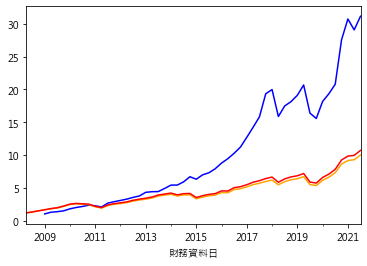

In [40]:
score = merge[positive_features].groupby(['財務資料日', '產業']).rank(pct=True).sum(axis = 1) 
rank = score.rank(pct = True) #總分再rank
filters = rank > 0.97
(merge[filters].groupby('財務資料日').mean()['季報酬率 %']*0.01+1).cumprod().plot(color = 'blue')  
(merge[~filters].groupby('財務資料日').mean()['季報酬率 %']*0.01+1).cumprod().plot(color = 'orange') 
(merge.groupby('財務資料日').mean()['季報酬率 %']*0.01 + 1).cumprod().plot(color = 'red') 

In [41]:
this_season = fin_data[fin_data['財務資料日'] == '2021-09-01']
this_season['產業'] = this_season['證券碼'].map(industry_code)
this_season = this_season.set_index(['證券碼', '財務資料日', '產業']).loc[:,positive_features]
score = this_season.groupby(['產業']).rank(pct=True).sum(axis = 1) 
rank =  score.rank(pct = True)
firm_list = [i[0] for i in rank[rank > 0.97].index]
firms = tejapi.get('TWN/AIND',
                  coid = firm_list,
                  opts = {'columns':['coid','fnamec']},
                  paginate = True,
                  chinese_column_name = True)
firms

<ipython-input-41-db616aae0742>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_season['產業'] = this_season['證券碼'].map(industry_code)


,公司簡稱,公司中文全稱
None,,
0,1102,亞洲水泥
1,1301,台灣塑膠工業
2,1303,南亞塑膠工業
3,1707,葡萄王生技
4,1723,中鋼碳素化學
5,2002,中國鋼鐵
6,2027,大成不銹鋼工業
7,2049,上銀科技
8,2059,川湖科技


<AxesSubplot:xlabel='年月日'>

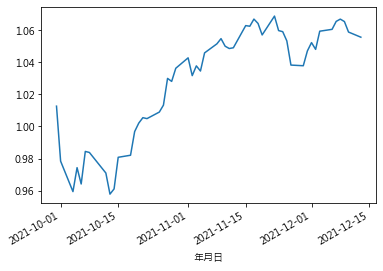

In [42]:
ret_sofar = tejapi.get('TWN/APRCD2',
           coid = firm_list,
           mdate = {'gte':'2021-09-30'},  
           opts = {'columns': ['coid', 'mdate', 'roia']},
           paginate = True,
           chinese_column_name = True)
ret_sofar.groupby('年月日')['日報酬率 %'].mean().apply(lambda x: 0.01*x + 1).cumprod().plot()